In [72]:
# importing nacessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
# loading dataset
try:
    df = pd.read_csv('advertising.csv', encoding='latin-1')
except UnicodeDecodeError as e:
    print(f'UnicodeDecodeError: {e}')
# printing some rows of dataset
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [75]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [85]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

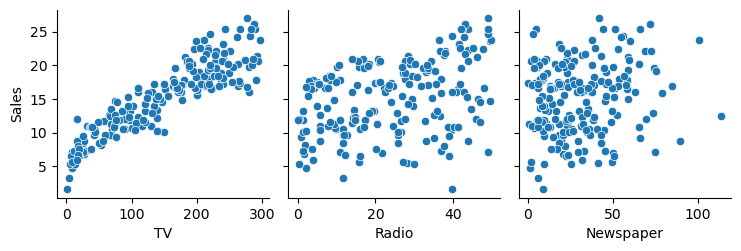

In [76]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='scatter')
plt.show()

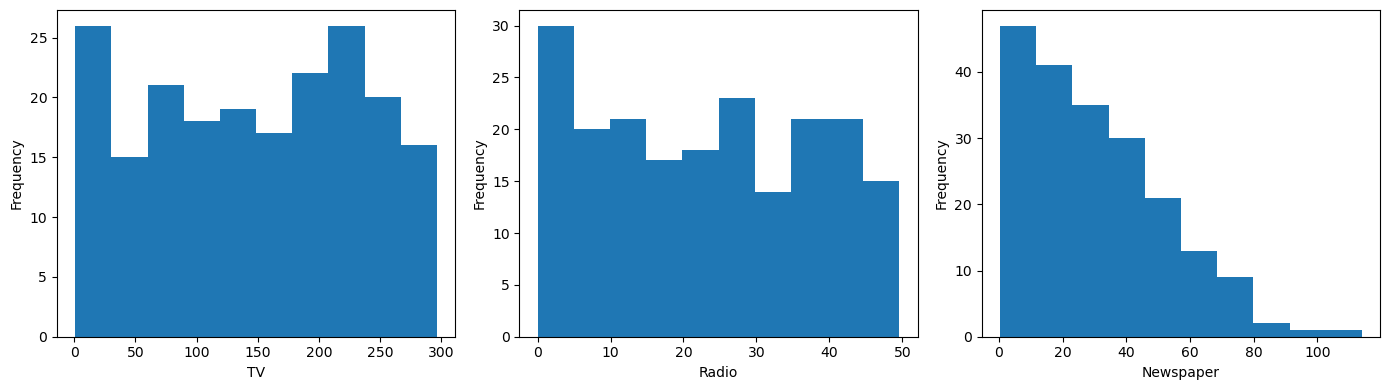

In [77]:
# expolatery data analysis
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
df['TV'].plot.hist(bins=10, xlabel='TV')

plt.subplot(1,3,2)
df['Radio'].plot.hist(bins=10, xlabel='Radio')

plt.subplot(1,3,3)
df['Newspaper'].plot.hist(bins=10, xlabel='Newspaper')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

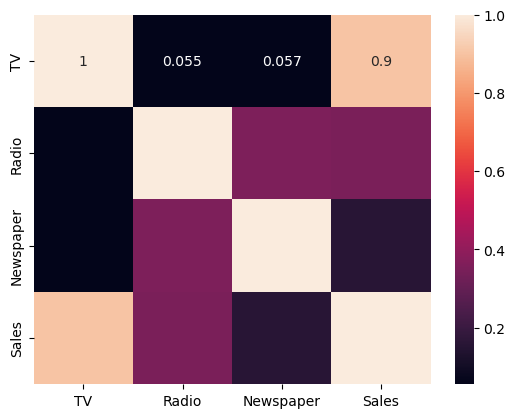

In [78]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [79]:
# Import necessary libraries for training and testing variables
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# splitng dataset for taining model and predict the target variable
X = df.drop('Sales', axis=1)
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [80]:
# Import necessary libraries for regression model
from sklearn.linear_model import LinearRegression

# fiting model on data and predicting the target variable
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model accuracy
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3.5157803072678906


In [81]:
# Importing nacessary libraries RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate and fit the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Mean Squared Error:", mse_rf)


Random Forest Mean Squared Error: 1.6364149833333383


In [82]:
# Importing nacessary libraries for GradientBoostingRegressor 
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate and fit the Gradient Boosting Regression model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
print("Gradient Boosting Mean Squared Error:", mse_gb)


Gradient Boosting Mean Squared Error: 1.5743107333568713


In [83]:
# Importing nacessary libraries SVR, StandardScaler 
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate and fit the SVR model
svr_model = SVR(kernel='rbf')  # RBF kernel is commonly used
svr_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
print("SVR Mean Squared Error:", mse_svr)


SVR Mean Squared Error: 4.440478995724434
